In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import datasets, decomposition
import plotly.express as px

In [4]:
data = pd.read_csv('heart.csv')

In [5]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]





In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [9]:
# Function for determining the number and percentages of missing values

def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [10]:
missing (data)

,Missing_Number,Missing_Percent
Age,0,0.0
Sex,0,0.0
ChestPainType,0,0.0
RestingBP,0,0.0
Cholesterol,0,0.0
FastingBS,0,0.0
RestingECG,0,0.0
MaxHR,0,0.0
ExerciseAngina,0,0.0
Oldpeak,0,0.0


Text(0.5, 1.0, 'Age distribution')

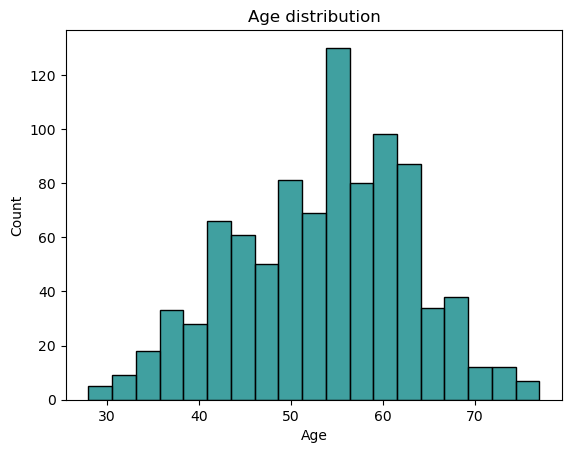

In [11]:
sns.histplot(data, x = 'Age', color = 'teal').set_title('Age distribution')

Text(0.5, 1.0, 'Sex distibution')

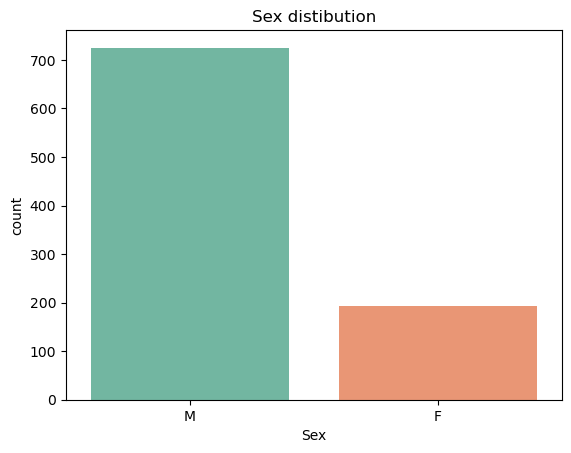

In [12]:
sns.countplot(data, x='Sex', hue='Sex', palette='Set2').set_title('Sex distibution')

HeartDisease
1    508
0    410
Name: count, dtype: int64


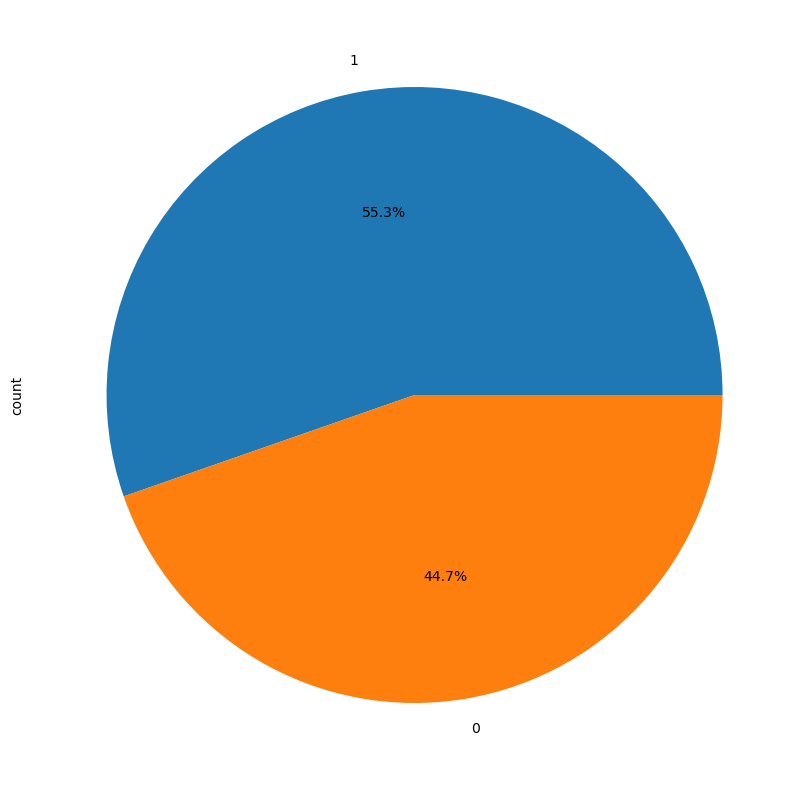

In [13]:
print(data["HeartDisease"].value_counts())
data["HeartDisease"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10));

<Axes: xlabel='Sex', ylabel='count'>

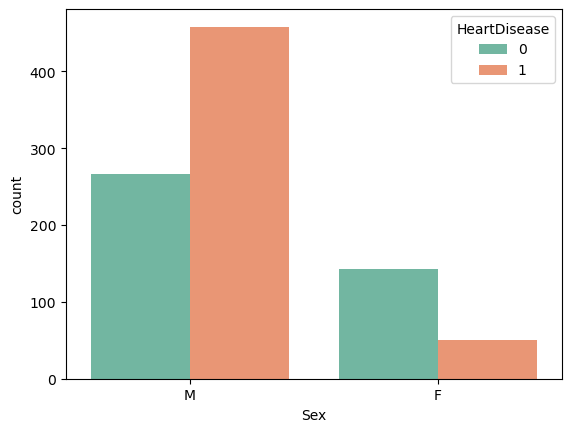

In [14]:
sns.countplot(data, x='Sex', hue='HeartDisease', palette='Set2')

Creating table with categorical type data

In [15]:
new_data = data.copy()

In [16]:
new_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [17]:
new_data['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'M' else 2)
# M: 1, F: 2
new_data['ChestPainType'] = new_data['ChestPainType'].apply(lambda x: 1 if x =='TA' else  (2 if x == 'ATA'else (3 if x == 'NAP' else 4)))
# TA: 1, ATA: 2, NAP: 3 Pain, ASY: 4
new_data['RestingECG'] = new_data['RestingECG'].apply(lambda x: 1 if x =='Normal' else  (2 if x == 'ST' else 3))
# Normal: 1, ST: 2, LVH: 3 Pain, ASY: 4
new_data['ExerciseAngina'] = new_data['ExerciseAngina'].apply(lambda x: 1 if x == 'Y' else 0)
# Y: 1, N: 0
new_data['ST_Slope'] = new_data['ST_Slope'].apply(lambda x: 1 if x =='Up' else  (2 if x == 'Flat' else 3))
# Up: 1, Flat: 2, Down: 3
new_data[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina','ST_Slope','Oldpeak']] = new_data[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina','ST_Slope','Oldpeak']].astype(int)
new_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,1,172,0,0,1,0
1,49,2,3,160,180,0,1,156,0,1,2,1
2,37,1,2,130,283,0,2,98,0,0,1,0
3,48,2,4,138,214,0,1,108,1,1,2,1
4,54,1,3,150,195,0,1,122,0,0,1,0


In [18]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             918 non-null    int64
 1   Sex             918 non-null    int32
 2   ChestPainType   918 non-null    int32
 3   RestingBP       918 non-null    int64
 4   Cholesterol     918 non-null    int64
 5   FastingBS       918 non-null    int64
 6   RestingECG      918 non-null    int32
 7   MaxHR           918 non-null    int64
 8   ExerciseAngina  918 non-null    int32
 9   Oldpeak         918 non-null    int32
 10  ST_Slope        918 non-null    int32
 11  HeartDisease    918 non-null    int64
dtypes: int32(6), int64(6)
memory usage: 64.7 KB


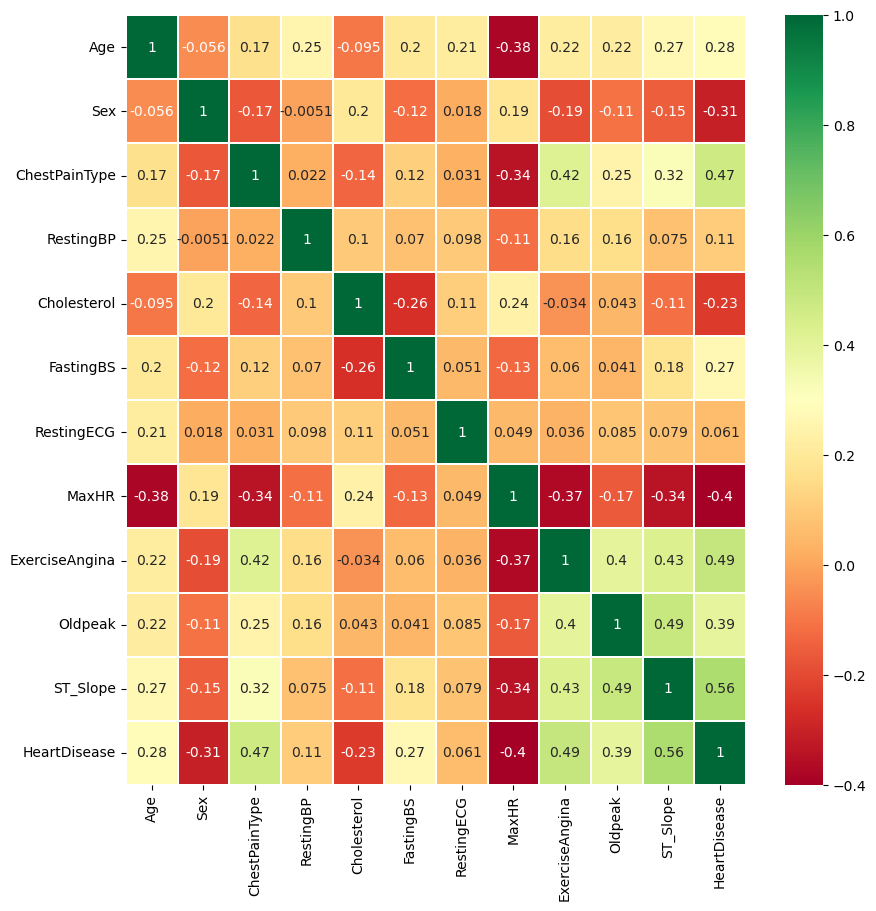

In [19]:
corr_matrix = new_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', linewidths = 0.2, annot_kws = {'size':10})

fig = plt.gcf()
fig.set_size_inches(10,10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

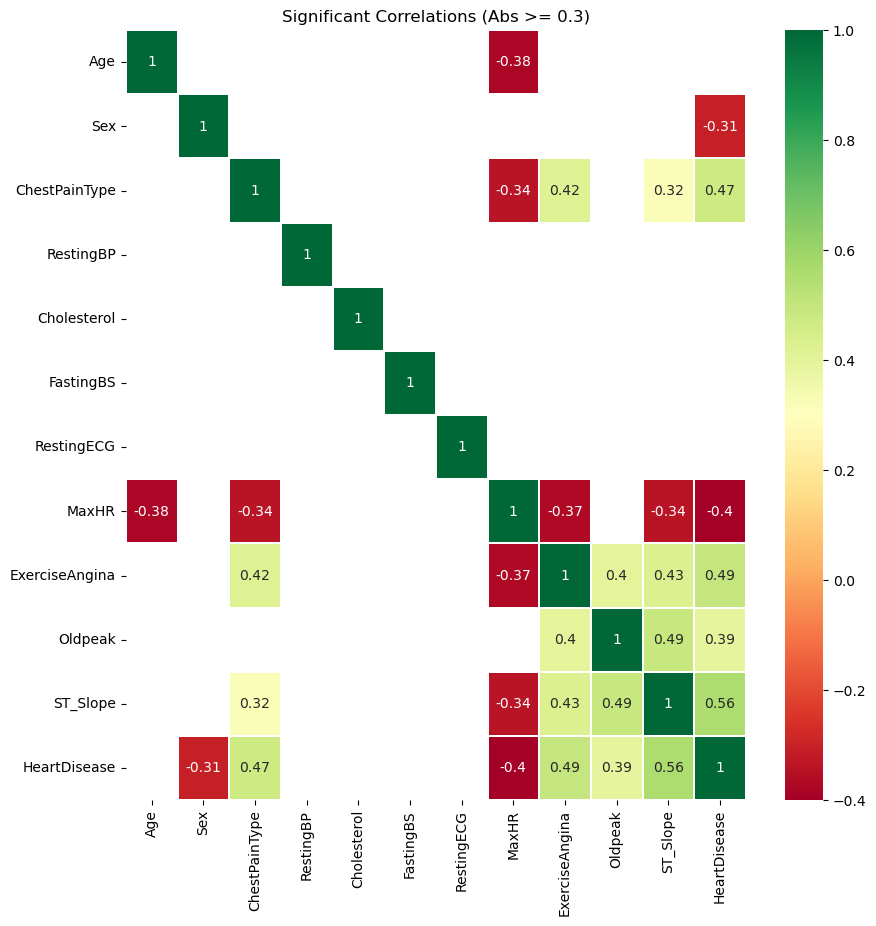

In [20]:
threshold = 0.3


significant_corr = corr_matrix[(corr_matrix >= threshold) | (corr_matrix <= -threshold)]


sns.heatmap(significant_corr, annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size': 10})

fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.title('Significant Correlations (Abs >= {})'.format(threshold))
plt.show()

Pairs to analyze:
1. HeartDisease / Sex
2. HeartDisease / ChestPainType
3. HeartDisease / MaxHR
4. HeartDisease / ExerciseAngina
5. HeartDisease / Oldpeak
6. HeartDisease / ST_Slope
7. ST_Slope / ChestPainType
8. ST_Slope / MaxHR
9. ST_Slope / ExerciseAngina
10. ST_Slope / Oldpeak
11. Oldpeak / ExerciseAngina
12. ExerciseAngina / ChestPainType
13. ExerciseAngina / MaxHR
14. MaxHR / Age
15. MaxHR / ChestPainType

**HeartDisease / ChestPainType**

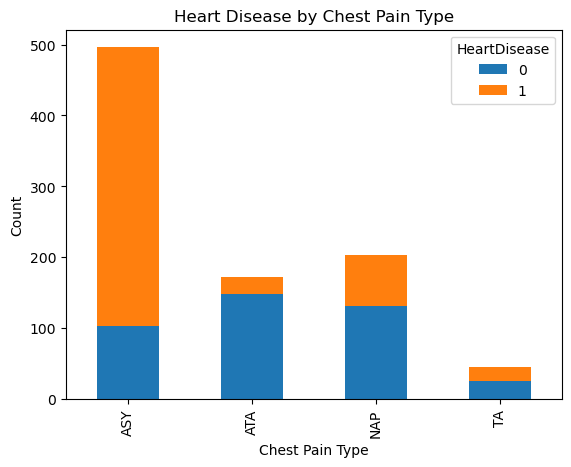

In [30]:
chest_pain_counts = data.groupby(['ChestPainType', 'HeartDisease']).size().unstack()
chest_pain_counts.plot(kind='bar', stacked=True)
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Heart Disease by Chest Pain Type')
plt.show()

So, we can assume that ASY (Asymptomatic) chest pain type is highly correlates with heart disease other than any other type.

**HeartDisease / MaxHR**

<Axes: xlabel='Sex', ylabel='MaxHR'>

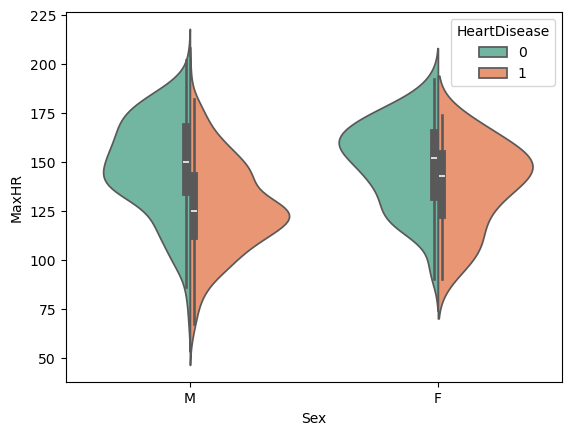

In [25]:
sns.violinplot(data, x="Sex", y="MaxHR", hue="HeartDisease", split=True, palette="Set2")

For males with heart disease maximum hear rate achived is significantly lower rather than for females. That is quite interesting fact but future analysis of this dataset may help understand such differences.

**HeartDisease / ExerciseAngina**

<Axes: xlabel='HeartDisease', ylabel='count'>

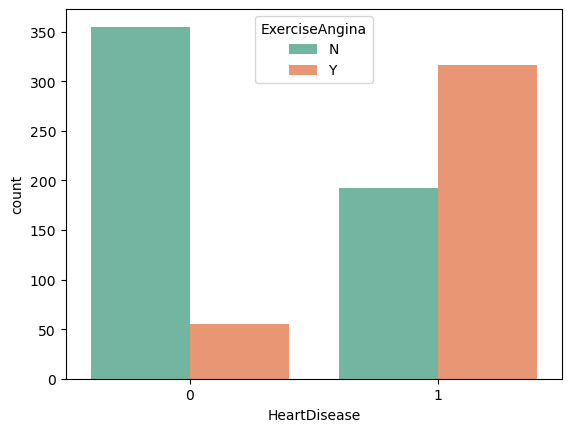

In [27]:
sns.countplot(data, x='HeartDisease', hue='ExerciseAngina', palette='Set2')

We can see strong connection between heart disease prescense and exercise induced angina.

**HeartDisease / Oldpeak**

<Axes: xlabel='Sex', ylabel='Oldpeak'>

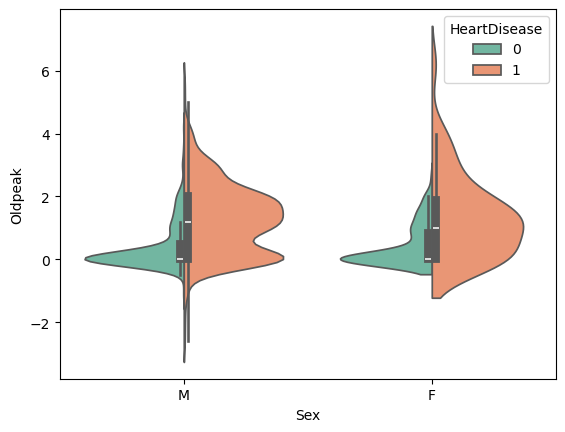

In [28]:
sns.violinplot(data, x="Sex", y="Oldpeak", hue="HeartDisease", split=True, palette="Set2")

We see that heart disease is strongly associated with abnormal ST upregulation.

**HeartDisease / ST_Slope**

<Axes: xlabel='HeartDisease', ylabel='count'>

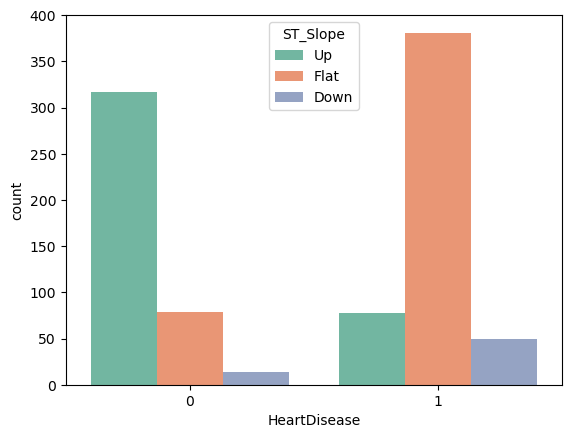

In [31]:
sns.countplot(data, x='HeartDisease', hue='ST_Slope', palette='Set2')

In non pathological situation ST Slope is upsloping in most cases and flat and sownsloping are not widely present. However, in heard disease most cases are with flat slope and there are more downsloping cases. So it can be one of most informative diagnostic criteria.

**ST_Slope / ChestPainType**

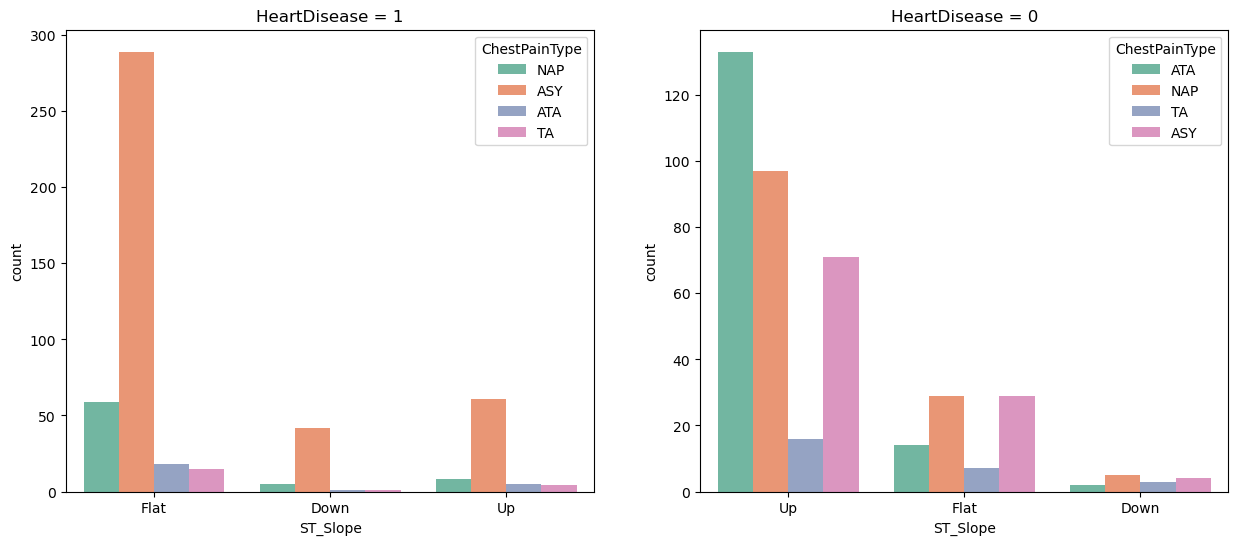

In [75]:
# Filter the dataframe by the condition 'HeartDisease' = 1 and 'HeartDisease' = 0
dp = data[data['HeartDisease'] == 1]
da = data[data['HeartDisease'] == 0]

f, ax = plt.subplots(1, 2, figsize=(15, 6))


sns.countplot(data=dp, x='ST_Slope', hue='ChestPainType', palette='Set2', ax=ax[0])
ax[0].set_title('HeartDisease = 1')


sns.countplot(data=da, x='ST_Slope', hue='ChestPainType', palette='Set2', ax=ax[1])
ax[1].set_title('HeartDisease = 0')

plt.show()


We can see that ASY can be diagnostic criteria with strong association with flat slope in present heart disease.

**ST_Slope / MaxHR**

<Axes: xlabel='ST_Slope', ylabel='MaxHR'>

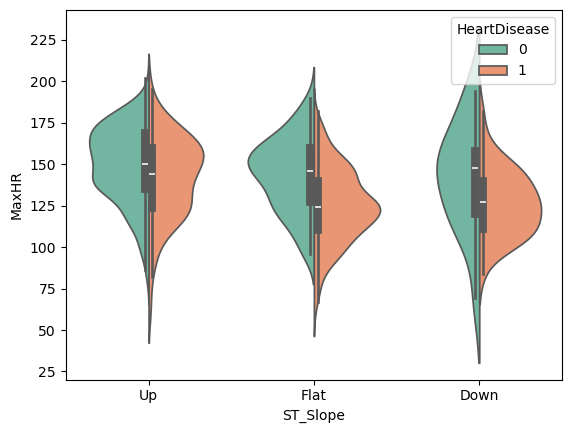

In [76]:
sns.violinplot(data, x="ST_Slope", y="MaxHR", hue="HeartDisease", split=True, palette="Set2")

For flat and down ST slope mean heart rate is lowered in disease cases compared to normal.

**ST_Slope / ExerciseAngina**

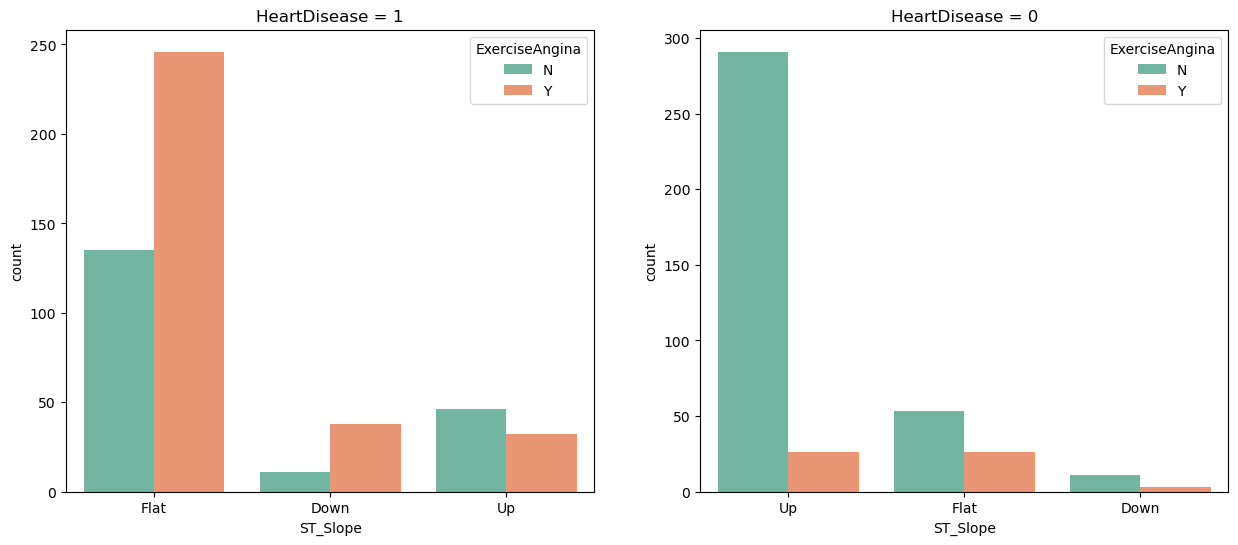

In [77]:
# Filter the dataframe by the condition 'HeartDisease' = 1 and 'HeartDisease' = 0
dp = data[data['HeartDisease'] == 1]
da = data[data['HeartDisease'] == 0]

f, ax = plt.subplots(1, 2, figsize=(15, 6))


sns.countplot(data=dp, x='ST_Slope', hue='ExerciseAngina', palette='Set2', ax=ax[0])
ax[0].set_title('HeartDisease = 1')


sns.countplot(data=da, x='ST_Slope', hue='ExerciseAngina', palette='Set2', ax=ax[1])
ax[1].set_title('HeartDisease = 0')

plt.show()

For pathological cases exercise angina associates with flat and downed ST slope but not with Up condition. In disease abscence in every ST slope type there is no association with angina prescence. 

**ST_Slope / Oldpeak**

<Axes: xlabel='ST_Slope', ylabel='Oldpeak'>

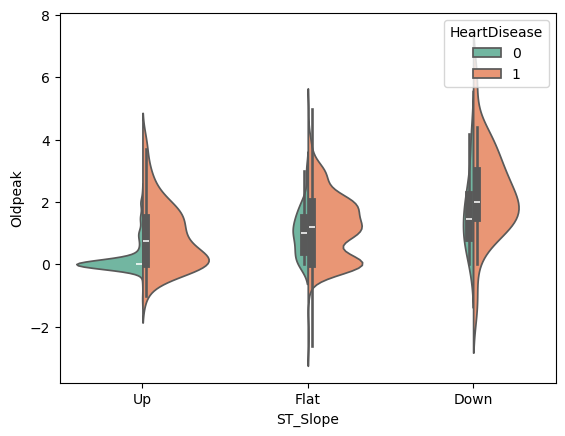

In [79]:
sns.violinplot(data, x="ST_Slope", y="Oldpeak", hue="HeartDisease", split=True, palette="Set2")

For downed ST slope there is strong mean difference between oldpeak in normal and pathological cases.

**Oldpeak / ExerciseAngina**

<Axes: xlabel='ExerciseAngina', ylabel='Oldpeak'>

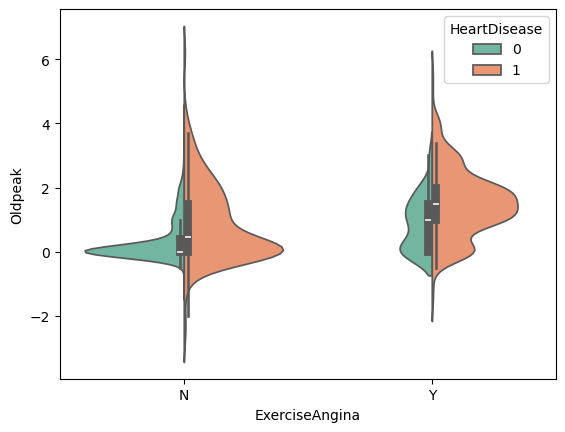

In [80]:
sns.violinplot(data, x="ExerciseAngina", y="Oldpeak", hue="HeartDisease", split=True, palette="Set2")

Despite that in both exercise angina cases mean for pathological cases is above normal, when there is no angina oldpeal looks the same. But in angina prescense there is no peak for no disease and strong peak for pathological cases. 

**ExerciseAngina / ChestPainType**

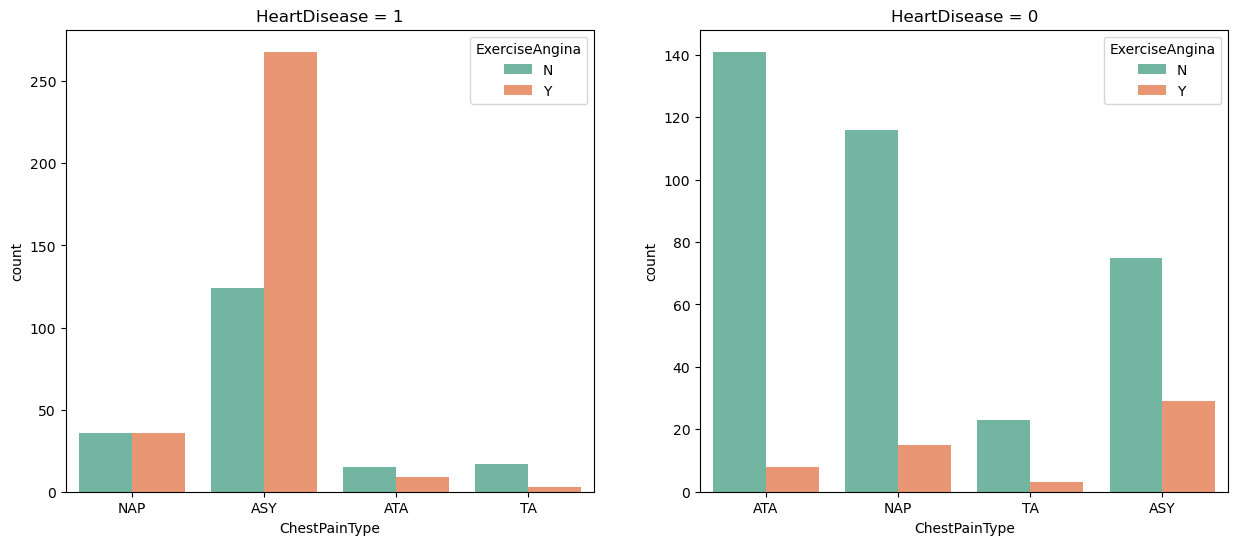

In [81]:
# Filter the dataframe by the condition 'HeartDisease' = 1 and 'HeartDisease' = 0
dp = data[data['HeartDisease'] == 1]
da = data[data['HeartDisease'] == 0]

f, ax = plt.subplots(1, 2, figsize=(15, 6))


sns.countplot(data=dp, x='ChestPainType', hue='ExerciseAngina', palette='Set2', ax=ax[0])
ax[0].set_title('HeartDisease = 1')


sns.countplot(data=da, x='ChestPainType', hue='ExerciseAngina', palette='Set2', ax=ax[1])
ax[1].set_title('HeartDisease = 0')

plt.show()

As previously exercise angina in pathological cases are strongly associated with asymptomatic chest pain type.

**ExerciseAngina / MaxHR**

<Axes: xlabel='ExerciseAngina', ylabel='MaxHR'>

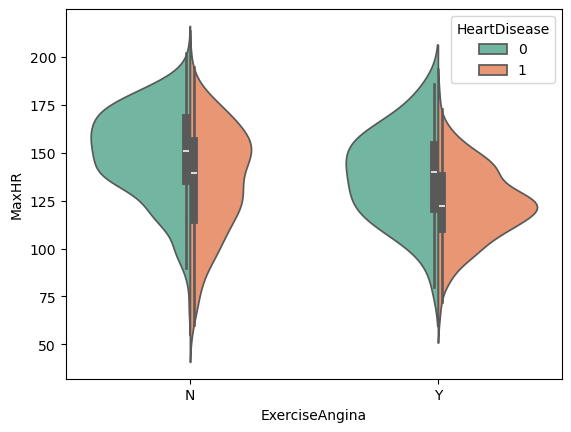

In [82]:
sns.violinplot(data, x="ExerciseAngina", y="MaxHR", hue="HeartDisease", split=True, palette="Set2")

When exercise angina is present we can see strong peak for lowered heart rate.

**MaxHR / Age**

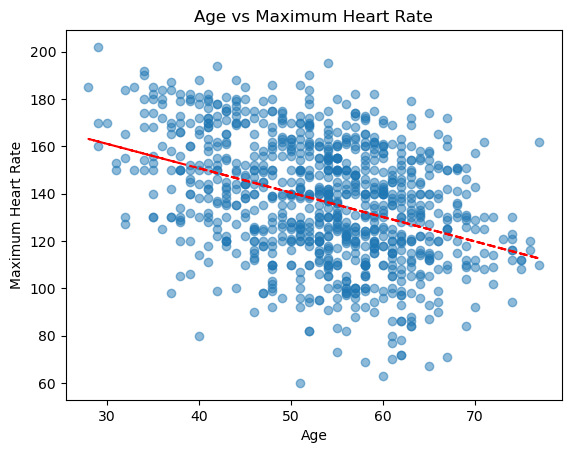

In [84]:
plt.scatter(data['Age'], data['MaxHR'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.title('Age vs Maximum Heart Rate')
z = np.polyfit(data['Age'], data['MaxHR'], 1)
p = np.poly1d(z)
plt.plot(data['Age'],p(data['Age']),"r--")

plt.show()

Maximum heart rate lowerage  is strongly associated with age.

**MaxHR / ChestPainType**

<Axes: xlabel='ChestPainType', ylabel='MaxHR'>

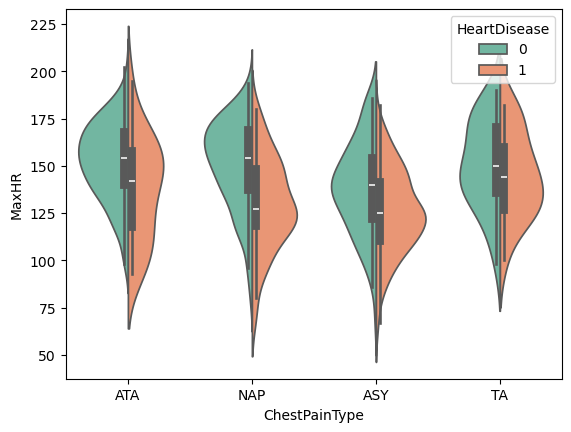

In [86]:
sns.violinplot(data, x="ChestPainType", y="MaxHR", hue="HeartDisease", split=True, palette="Set2")

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


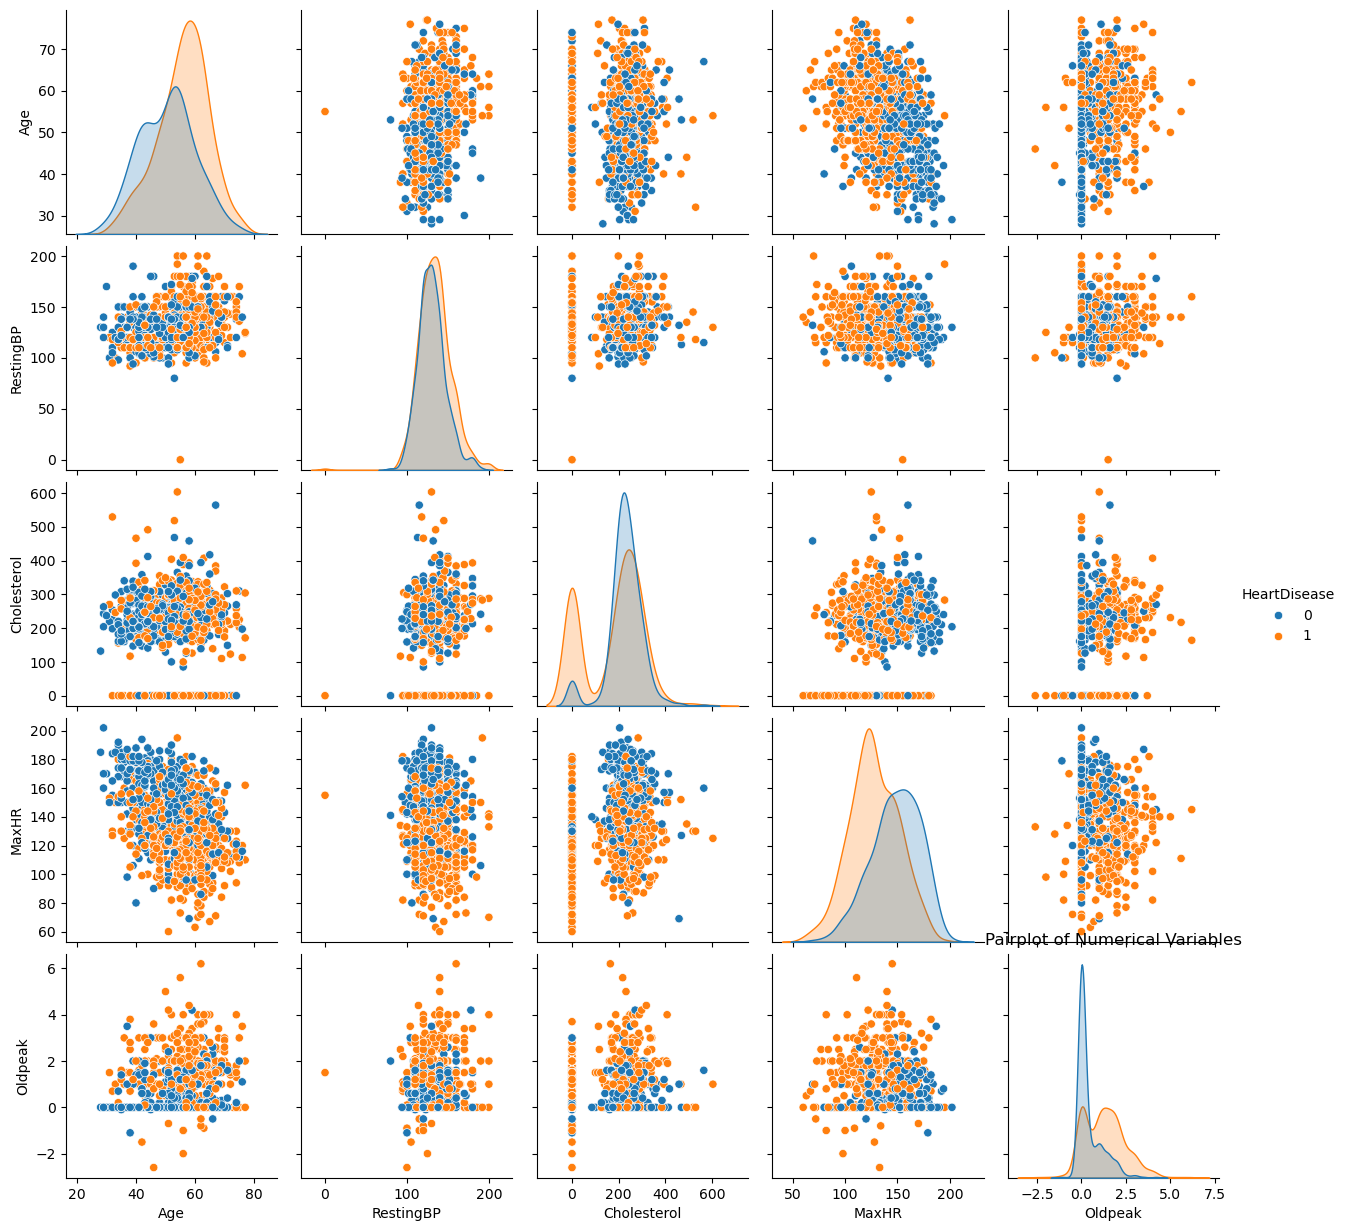

In [42]:
sns.pairplot(data[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']], hue='HeartDisease')
plt.title('Pairplot of Numerical Variables')
plt.show()

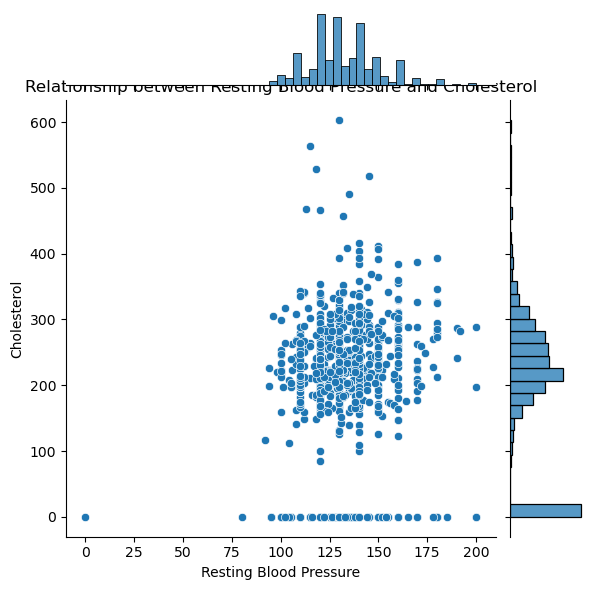

In [49]:
sns.jointplot(x='RestingBP', y='Cholesterol', data=data, kind='scatter')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Cholesterol')
plt.title('Relationship between Resting Blood Pressure and Cholesterol')
plt.show()

In [51]:
cross_tab = pd.crosstab(data['HeartDisease'], data['ExerciseAngina'])
print(cross_tab)

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(cross_tab)
print('Chi-square statistic:', chi2)
print('p-value:', p)

ExerciseAngina    N    Y
HeartDisease            
0               355   55
1               192  316
Chi-square statistic: 222.25938271530583
p-value: 2.907808387659878e-50


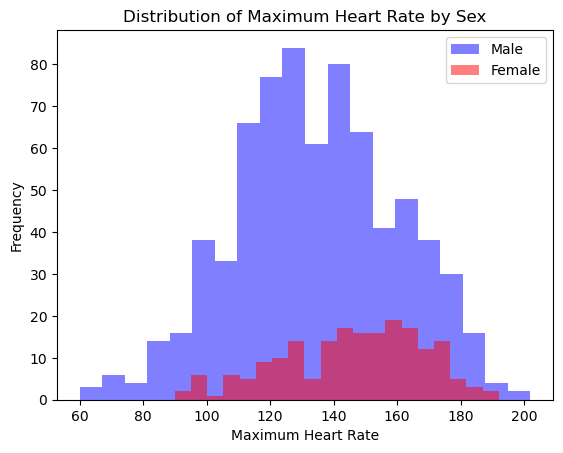

In [53]:
plt.hist(data[data['Sex'] == 'M']['MaxHR'], bins=20, alpha=0.5, label='Male', color='blue')
plt.hist(data[data['Sex'] == 'F']['MaxHR'], bins=20, alpha=0.5, label='Female', color='red')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Maximum Heart Rate by Sex')
plt.legend()
plt.show()

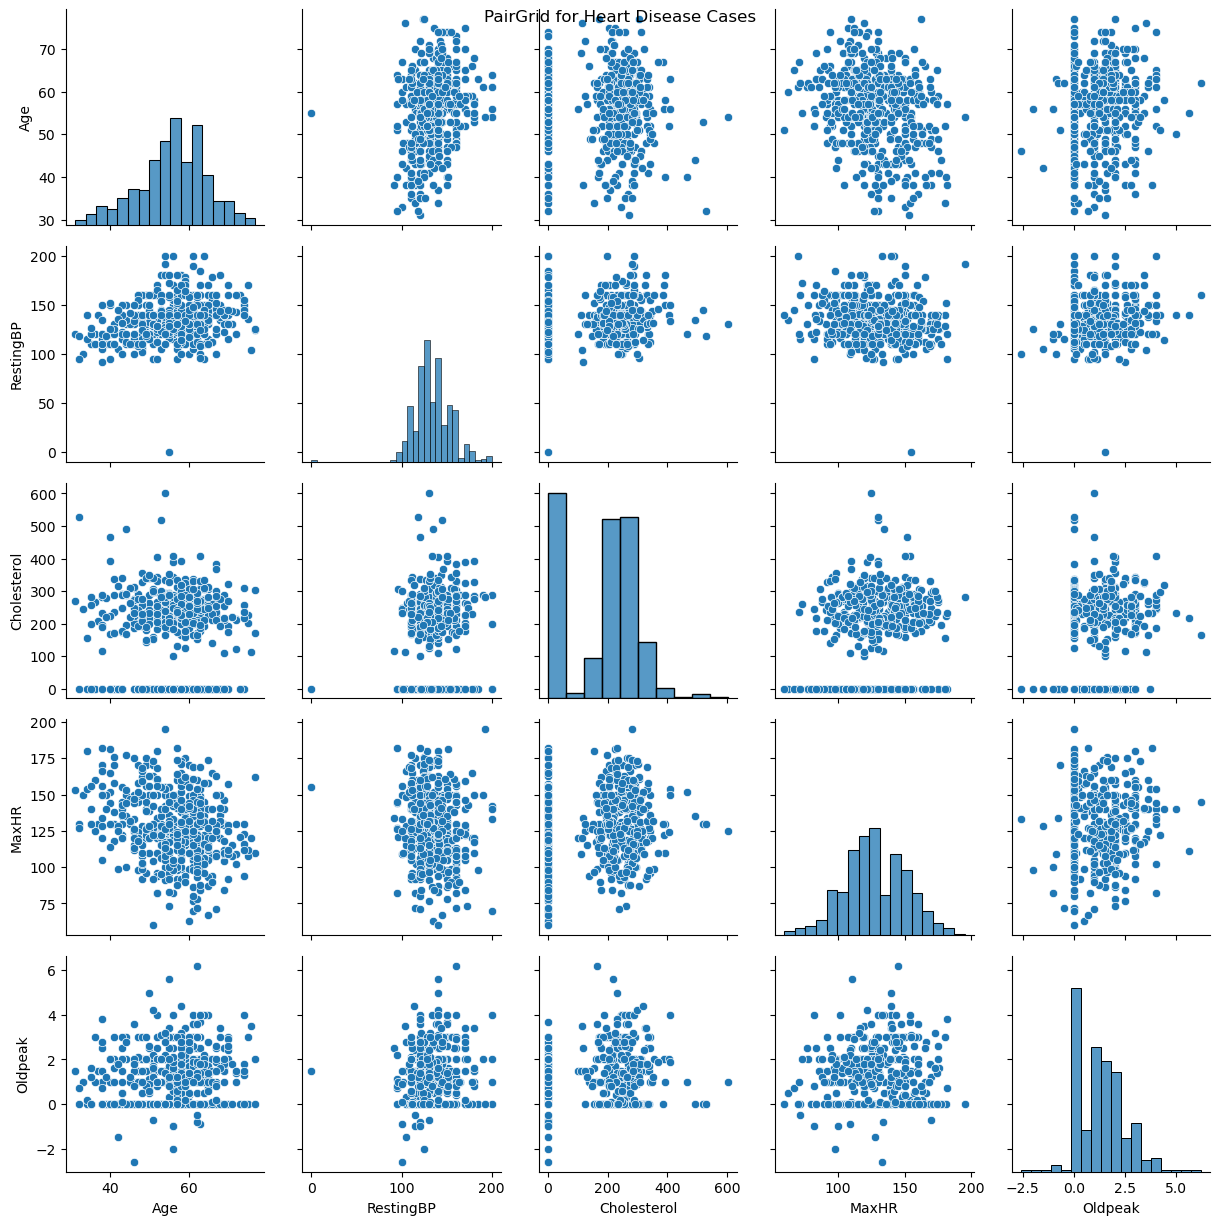

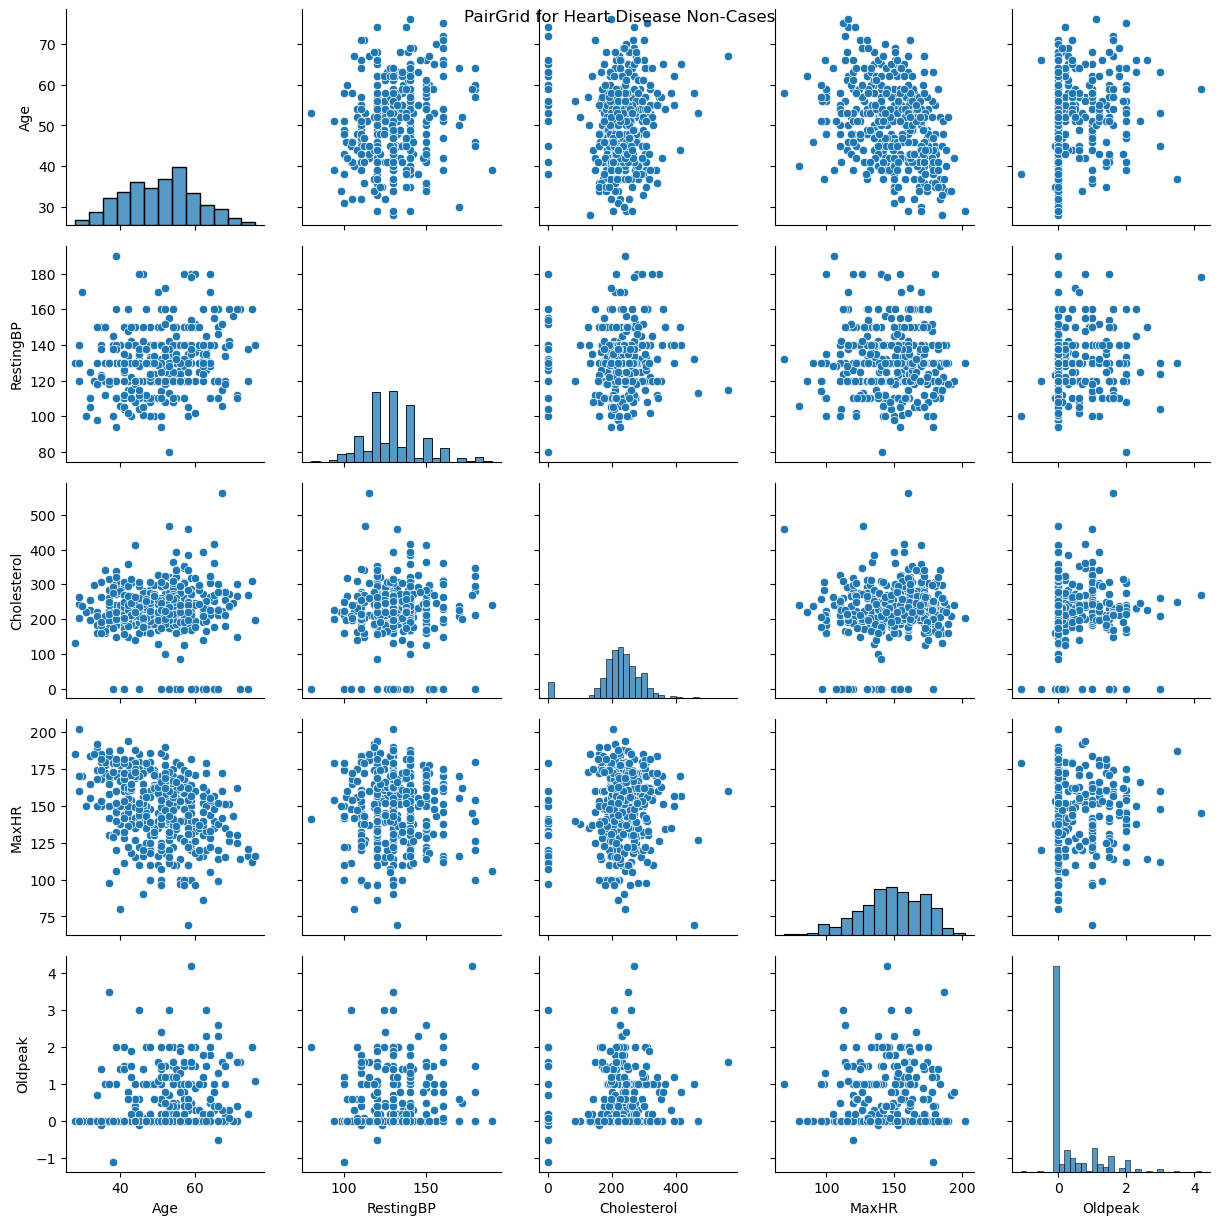

In [54]:
# Subset data for heart disease cases and non-cases
heart_disease_cases = data[data['HeartDisease'] == 1]
heart_disease_non_cases = data[data['HeartDisease'] == 0]

# PairGrid for heart disease cases
g = sns.PairGrid(heart_disease_cases[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.fig.suptitle('PairGrid for Heart Disease Cases')
plt.show()

# PairGrid for heart disease non-cases
g = sns.PairGrid(heart_disease_non_cases[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.fig.suptitle('PairGrid for Heart Disease Non-Cases')
plt.show()

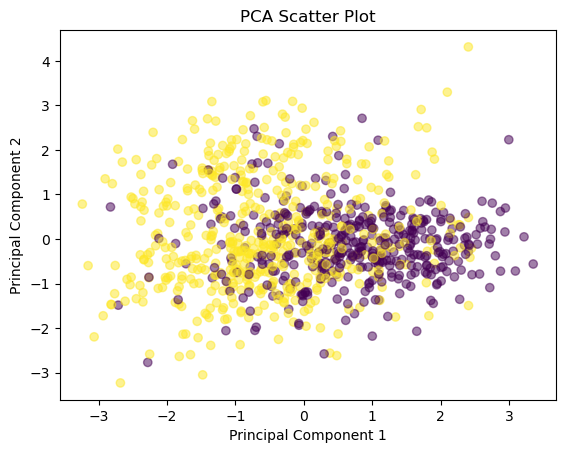

In [64]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['HeartDisease'], cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.show()